In [1]:
# primera fila input image
# segunda fila unet result
# tercera fila skeleton net result

import matplotlib.pyplot as plt
import os
import cv2
from unet import UNet
from hednet import HedNet
from utils.test_utils import *
from utils.net_utils import *

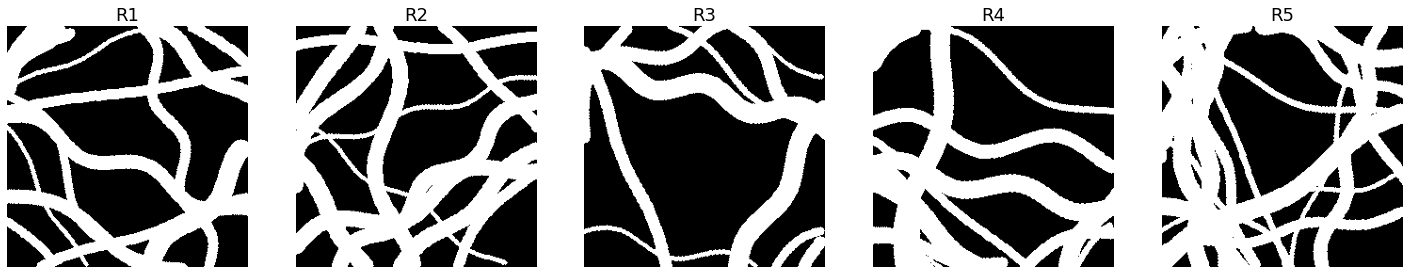

In [46]:
folder_path = 'data/ofda/raw'

plt.figure(figsize=(5*5,5))
k = 0
for filename in os.listdir(folder_path):
    if k >= 5:
        break
    img_path = os.path.join(folder_path,filename)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path, 0)
        #img = 255 - img
        plt.subplot(1,5,k+1), plt.axis('off'), plt.title(f'R{k+1}', fontdict = {'fontsize' : 18}), plt.imshow(img, cmap='gray')
        k=k+1
        
#plt.savefig('resultados/real.png', bbox_inches='tight')
plt.show()

In [ ]:
# segmentar el mapa de distancia y mostrar
#   obtener el mapa de distancia
#   

In [38]:
tensor_batch = batch_from_folder('data/ofda/images')

device = torch.device('cpu')

net = UNet(n_channels=3, n_classes=1, bilinear=False)

########
state_dict = torch.load('checkpoints/MODEL_dist_ours.pth', map_location=device)
from collections import OrderedDict
new_state_dict = OrderedDict()
for k,v in state_dict.items():
    name = k[7:]
    new_state_dict[name] = v
########

net.load_state_dict(new_state_dict)
# net.to(device=device)
net.eval()


dm_list_unet = predict_dm_list(net, {'image':tensor_batch}, device)

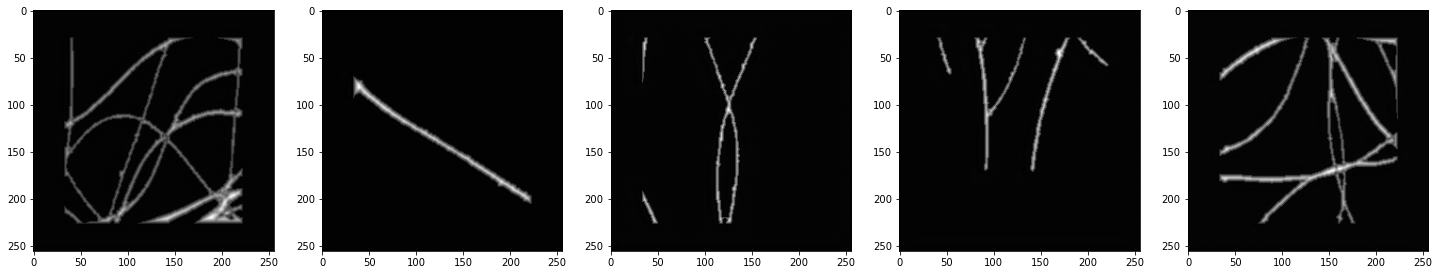

In [10]:
plt.figure(figsize=(5*5,5))

for i, dm in enumerate(dm_list_unet):
    plt.subplot(1,5,i+1), plt.imshow(dm, cmap='gray')
    
plt.show()

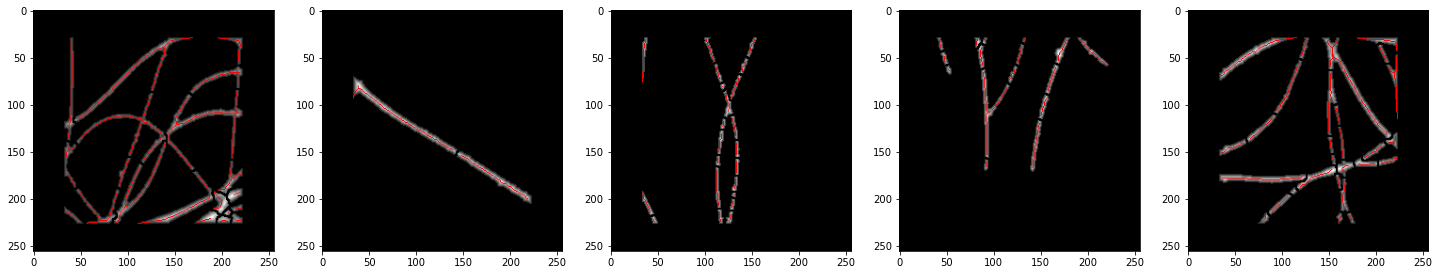

In [39]:
plt.figure(figsize=(5*5,5))

for i,distance_map in enumerate(dm_list_unet):
    dm_normalized = cv2.normalize(distance_map, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    segmentos = PostProcess(dm_normalized, 40, 32)
  
#     dm_seg = distance_map[] 
#     segmentos[segmentos>0] = 1
    dm_normalized[segmentos==0] = 0
    
    dm_normalized = cv2.cvtColor(dm_normalized,cv2.COLOR_GRAY2RGB)
    
    for j in range(0, segmentos.max()):
        segmento = (segmentos==j+1)
        seg_skeleton = morphology.skeletonize(segmento, method='lee')
        dm_normalized[seg_skeleton>0] = (255,0,0)

    plt.subplot(1,5,i+1), plt.imshow(dm_normalized)
    
plt.show()

In [43]:
tensor_batch = batch_from_folder('data/ofda/images')

device = torch.device('cpu')

net = HedNet(n_channels=3, n_classes=1, bilinear=False, side=4, use_cuda=False)

########
state_dict = torch.load('checkpoints/MODEL_snet_reg_ours.pth', map_location=device)
from collections import OrderedDict
new_state_dict = OrderedDict()
for k,v in state_dict.items():
    name = k[7:]
    new_state_dict[name] = v
########

net.load_state_dict(new_state_dict)
# net.to(device=device)
net.eval()

dm_list_snet = predict_dm_list(net, {'image':tensor_batch}, device)

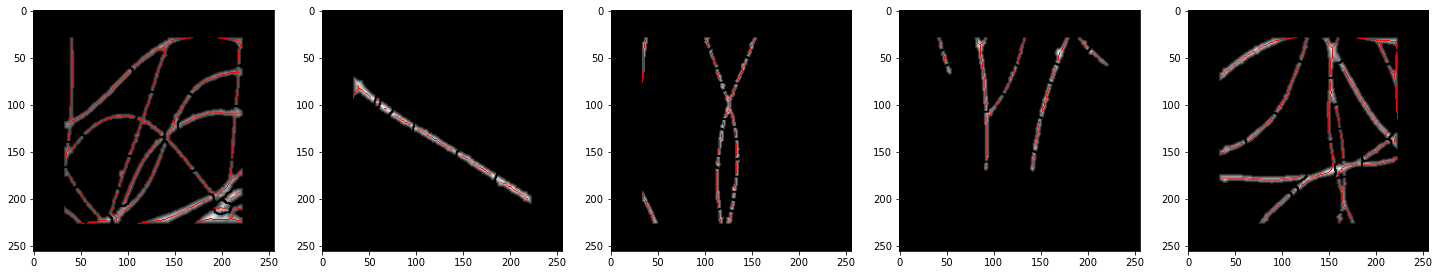

In [44]:
plt.figure(figsize=(5*5,5))

for i,distance_map in enumerate(dm_list_snet):
    dm_normalized = cv2.normalize(distance_map, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    segmentos = PostProcess(dm_normalized, 40, 32)
  
#     dm_seg = distance_map[] 
#     segmentos[segmentos>0] = 1
    dm_normalized[segmentos==0] = 0
    
    dm_normalized = cv2.cvtColor(dm_normalized,cv2.COLOR_GRAY2RGB)
    
    for j in range(0, segmentos.max()):
        segmento = (segmentos==j+1)
        seg_skeleton = morphology.skeletonize(segmento, method='lee')
        dm_normalized[seg_skeleton>0] = (255,0,0)

    plt.subplot(1,5,i+1), plt.imshow(dm_normalized)
    
plt.show()

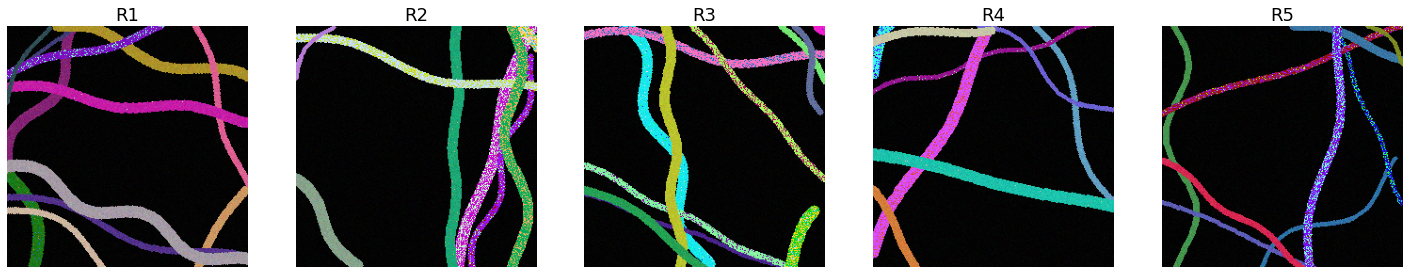

In [2]:
imgs_list = []

folder_path = 'data_dm_overlapping/imgs'

plt.figure(figsize=(5*5,5))
k = 0
for filename in os.listdir(folder_path):
    if k >= 5:
        break
    img_path = os.path.join(folder_path,filename)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)
        #img = 255 - img
        imgs_list.append(img)
        
        plt.subplot(1,5,k+1), plt.axis('off'), plt.title(f'R{k+1}', fontdict = {'fontsize' : 18}), plt.imshow(img)
        k=k+1
        
#plt.savefig('resultados/real.png', bbox_inches='tight')
plt.show()

In [3]:
tensor_batch = batch_from_list(imgs_list)

device = torch.device('cpu')

net = UNet(n_channels=3, n_classes=1, bilinear=False)

########
state_dict = torch.load('checkpoints/MODEL_dist_ours.pth', map_location=device)
from collections import OrderedDict
new_state_dict = OrderedDict()
for k,v in state_dict.items():
    name = k[7:]
    new_state_dict[name] = v
########

net.load_state_dict(new_state_dict)
# net.to(device=device)
net.eval()


dm_list_unet = predict_dm_list(net, {'image':tensor_batch}, device)

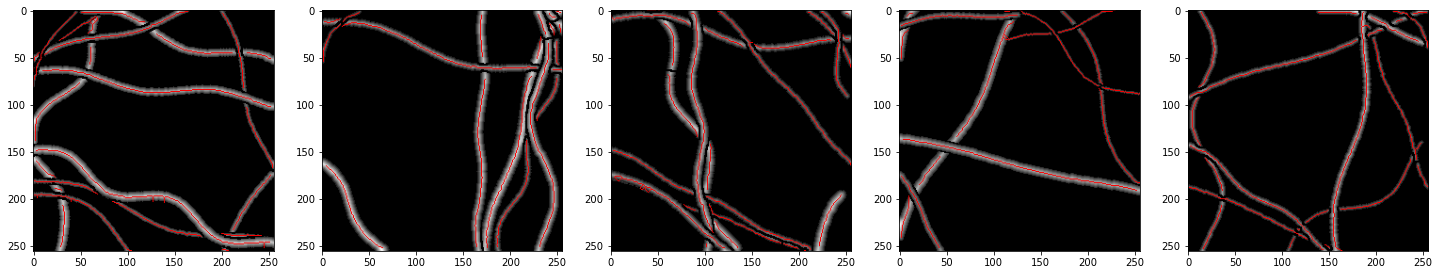

In [5]:
plt.figure(figsize=(5*5,5))

for i,distance_map in enumerate(dm_list_unet):
    dm_normalized = cv2.normalize(distance_map, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    segmentos = PostProcess(dm_normalized, 40, 32)
  
#     dm_seg = distance_map[] 
#     segmentos[segmentos>0] = 1
    dm_normalized[segmentos==0] = 0
    
    dm_normalized = cv2.cvtColor(dm_normalized,cv2.COLOR_GRAY2RGB)
    
    for j in range(0, segmentos.max()):
        segmento = (segmentos==j+1)
        seg_skeleton = morphology.skeletonize(segmento, method='lee')
        dm_normalized[seg_skeleton>0] = (255,0,0)

    plt.subplot(1,5,i+1), plt.imshow(dm_normalized)
    
plt.show()

In [6]:
tensor_batch = batch_from_list(imgs_list)

device = torch.device('cpu')

net = HedNet(n_channels=3, n_classes=1, bilinear=False, side=4, use_cuda=False)

########
state_dict = torch.load('checkpoints/MODEL_snet_reg_ours.pth', map_location=device)
from collections import OrderedDict
new_state_dict = OrderedDict()
for k,v in state_dict.items():
    name = k[7:]
    new_state_dict[name] = v
########

net.load_state_dict(new_state_dict)
# net.to(device=device)
net.eval()

dm_list_snet = predict_dm_list(net, {'image':tensor_batch}, device)

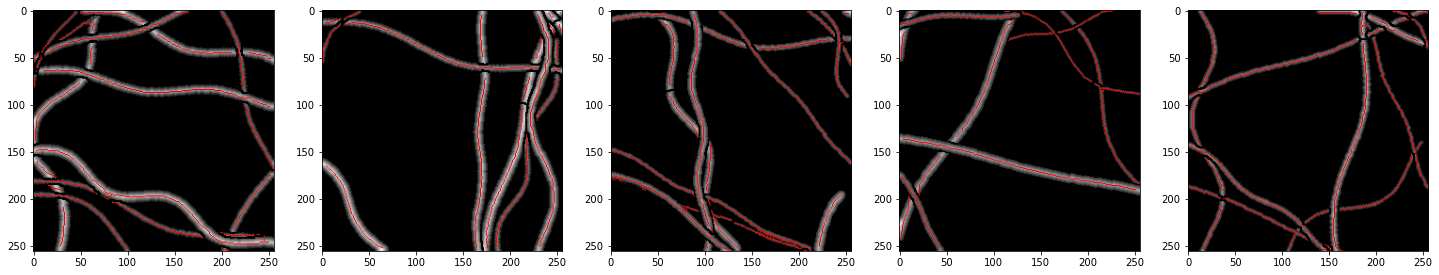

In [7]:
plt.figure(figsize=(5*5,5))

for i,distance_map in enumerate(dm_list_snet):
    dm_normalized = cv2.normalize(distance_map, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    segmentos = PostProcess(dm_normalized, 40, 32)
  
    dm_normalized[segmentos==0] = 0
    
    dm_normalized = cv2.cvtColor(dm_normalized,cv2.COLOR_GRAY2RGB)
    
    for j in range(0, segmentos.max()):
        segmento = (segmentos==j+1)
        seg_skeleton = morphology.skeletonize(segmento, method='lee')
        dm_normalized[seg_skeleton>0] = (255,0,0)

    plt.subplot(1,5,i+1), plt.imshow(dm_normalized)
    
plt.show()